# Reference Impl from TF Docs

https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 176s 1us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


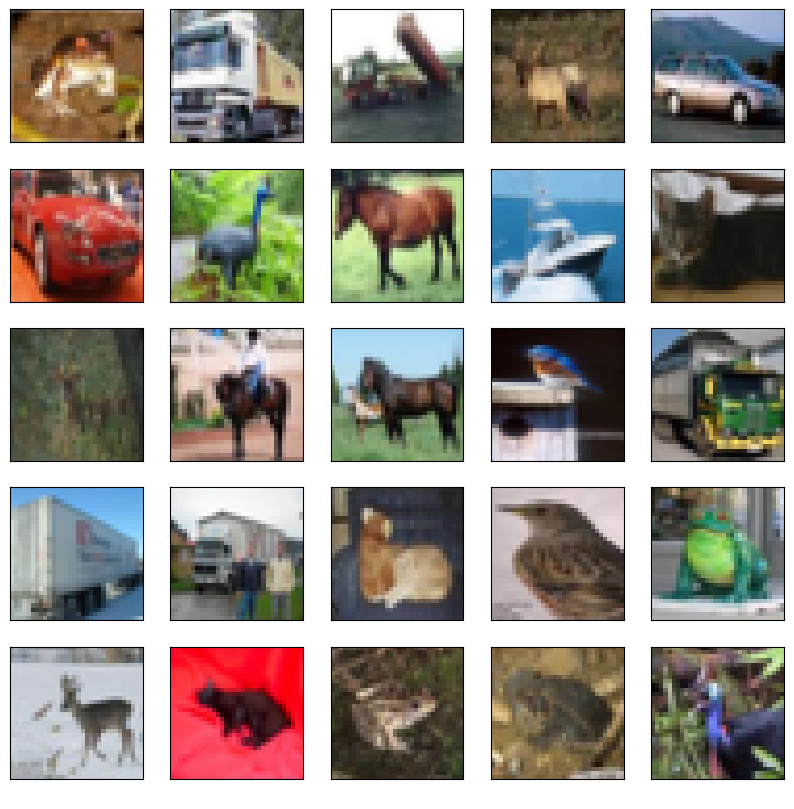

In [ ]:
from turtle import color

# cifar 10 class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# cifar 100 class labels
# class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy',
#                'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
#                'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest',
#                'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
#                'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter',
#                'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
#                'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
#                'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
#                'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]], color='white')
plt.show()


# Lets build Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5388 - accuracy: 0.4348 - val_loss: 1.2349 - val_accuracy: 0.5527
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1418 - accuracy: 0.5937 - val_loss: 1.0865 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9954 - accuracy: 0.6519 - val_loss: 0.9834 - val_accuracy: 0.6582
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8944 - accuracy: 0.6840 - val_loss: 1.0494 - val_accuracy: 0.6383
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8207 - accuracy: 0.7130 - val_loss: 0.8831 - val_accuracy: 0.6942
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7589 - accuracy: 0.7318 - val_loss: 0.9060 - val_accuracy: 0.6920
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7068 - accuracy: 0.7515 - val_loss: 0.8621 -

313/313 - 2s - loss: 0.8814 - accuracy: 0.7074 - 2s/epoch - 7ms/step


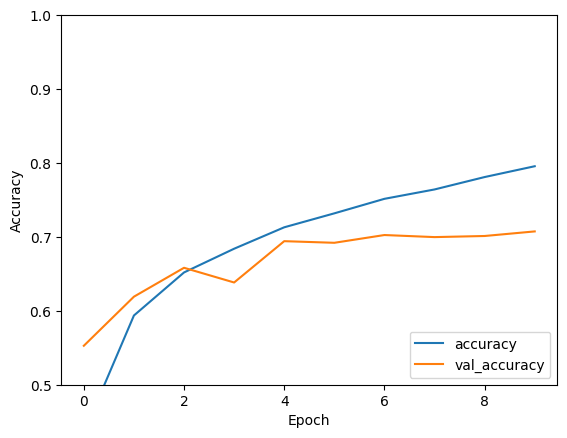

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Save Model

In [ ]:
# Serialize
model.save('cifar10.h5')

In [ ]:
test_images[0].shape

(32, 32, 3)

# Lets Predict 1 test image

In [ ]:
print(test_images[0].shape)

print(tf.expand_dims(test_images[0], 0).shape)

(32, 32, 3)
(1, 32, 32, 3)


This image #0  most likely belongs to whale with a 26.48 percent confidence.
This image #1  most likely belongs to forest with a 16.93 percent confidence.
This image #2  most likely belongs to dinosaur with a 20.85 percent confidence.
This image #3  most likely belongs to mushroom with a 30.19 percent confidence.
This image #4  most likely belongs to cloud with a 47.06 percent confidence.


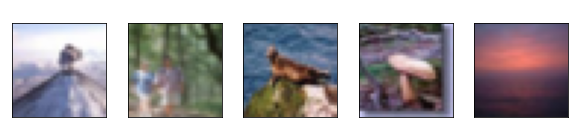

In [ ]:
import numpy as np


plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[test_labels[i][0]],color='white')
    plt.title('TRUE TARGET #{}'.format(i),color='white')
    #change image dim
    img_arr = tf.expand_dims(test_images[i], 0)
    p = model.predict(img_arr)
    score = tf.nn.softmax(p)
    print(
        "This image #{}  most likely belongs to {} with a {:.2f} percent confidence."
        .format(i,class_names[np.argmax(score)], 100 * np.max(score))
    )
plt.show()